 # Importing all the necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

#Loading the Data

In [19]:
data = pd.read_csv("creditcard.csv")
# Impute NaN values in the 'Class' column before splitting
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['Class'] = imputer.fit_transform(data['Class'].values.reshape(-1, 1)).flatten()
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
data.shape

(9965, 31)

**The dataset contains 284,807 transactions with 31 features including**

#Understanding the Data

In [7]:
print(data.describe())

               Time           V1           V2           V3           V4  \
count   9965.000000  9965.000000  9965.000000  9964.000000  9964.000000   
mean    5934.484897    -0.241681     0.280693     0.906359     0.260247   
std     4449.407112     1.522695     1.308882     1.156948     1.440500   
min        0.000000   -27.670569   -34.607649   -15.496222    -4.657545   
25%     2061.000000    -1.012157    -0.208591     0.412198    -0.615591   
50%     4547.000000    -0.372624     0.286179     0.943149     0.218492   
75%    10163.000000     1.151506     0.900823     1.601871     1.119367   
max    14864.000000     1.960497     8.636214     4.101716    10.463020   

                V5           V6           V7           V8           V9  ...  \
count  9964.000000  9964.000000  9964.000000  9964.000000  9964.000000  ...   
mean     -0.046342     0.132335    -0.071847    -0.065317     0.801220  ...   
std       1.183634     1.307586     1.077872     1.260140     1.156424  ...   
min     

*  Time: This shows how many seconds have passed since the first transaction in the dataset.
*  V1-V28: These are special features created to hide sensitive information about the original data.
*  Amount: Transaction amount.
*  Class: Target variable (0 for normal transactions, 1 for fraudulent transactions).

#Describing the Data

## Analyzing Class Distribution
The next step is to check the distribution of fraudulent vs. normal transactions.

*  We separate the dataset into two groups: fraudulent transactions (Class == 1) and valid transactions (Class == 0).
*  It calculates the ratio of fraud cases to valid cases to measure how imbalanced the dataset is.
*  It then prints the outlier fraction along with the number of fraud and valid transactions.
*  This analysis is crucial in fraud detection, as it reveals how rare fraud cases are and whether techniques like resampling or special evaluation metrics are needed.

#Imbalance in the data

In [8]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = (len(fraud)/float(len(valid)))*100
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.38283296393310495
Fraud Cases: 38
Valid Transactions: 9926


Since the dataset is highly imbalanced with only 0.18% fraudulent transactions. we’ll first try to build a model without balancing the dataset. If we don’t get satisfactory results we will explore ways to handle the imbalance.

#Print the amount details for Fraudulent Transaction

In [9]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,38.000000
mean,75.730526
std,304.521215
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1809.680000


# Print the amount details for Normal Transaction

In [10]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,9926.000000
mean,62.919501
std,184.041297
min,0.000000
25%,5.172500
50%,15.950000
75%,51.067500
max,7712.430000


#Plotting the Correlation Matrix

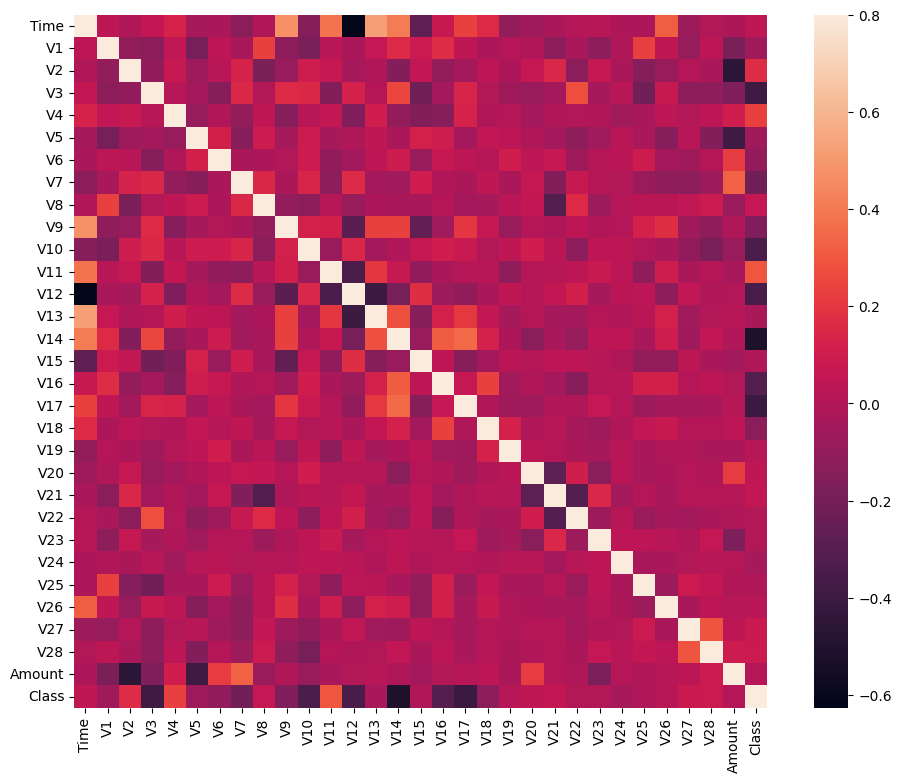

In [11]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Most features do not correlate strongly with others but some features like V2 and V5 have a negative correlation with the Amount feature. This provides valuable insights into how the features are related to the transaction amounts.

#Separating the X and the Y values

In [21]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)#removes the target column
Y = data["Class"]# selects the Class column as the target variable (fraud or not).
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(190239, 30)
(190239,)


#Training and Testing Data Bifurcation

In [22]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


#Building a Random Forest Model using scikit learn

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [15]:
from sklearn.impute import SimpleImputer
print("NaN values in yTest before imputation:", np.isnan(yTest).sum())

imputer = SimpleImputer(strategy='most_frequent')
yTest = imputer.fit_transform(yTest.reshape(-1, 1)).flatten()
print("NaN values in yTest after imputation:", np.isnan(yTest).sum())

NaN values in yTest before imputation: 0
NaN values in yTest after imputation: 0


# Building all kinds of evaluating parameters

In [24]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

The model used is Random Forest classifier


In [25]:
acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

The accuracy is 0.9996057611438184


In [26]:
prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

The precision is 0.9402985074626866


In [27]:
rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

The recall is 0.8513513513513513


In [28]:
f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

The F1-Score is 0.8936170212765957


In [29]:
MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The Matthews correlation coefficient is0.8945271498698677


We observe:

*  **Accuracy: 0.9996**: Out of all predictions, 99.96% were correct. However, in imbalanced datasets (like fraud detection), accuracy can be misleading i.e. a model that predicts everything as "not fraud" will still have high accuracy.
*  **Precision: 0.94029**: When the model predicted "fraud", it was correct 94.02% of the time. High precision means very few false alarms (false positives).
*  **Recall: 0.85135**: Out of all actual fraud cases, the model detected 85.13%. This shows how well it catches real frauds. A lower recall means some frauds were missed (false negatives).
*  **F1-Score: 0.89361**: A balance between precision and recall. 89.36% is strong and shows the model handles both catching fraud and avoiding false alarms well.
*  **Matthews Correlation Coefficient (MCC): 0.894527**: A more balanced score (from -1 to +1) even when classes are imbalanced. A value of 0.894527 is very good, it means the model is making strong, balanced predictions overall

#Visualizing the Confusion Matrix

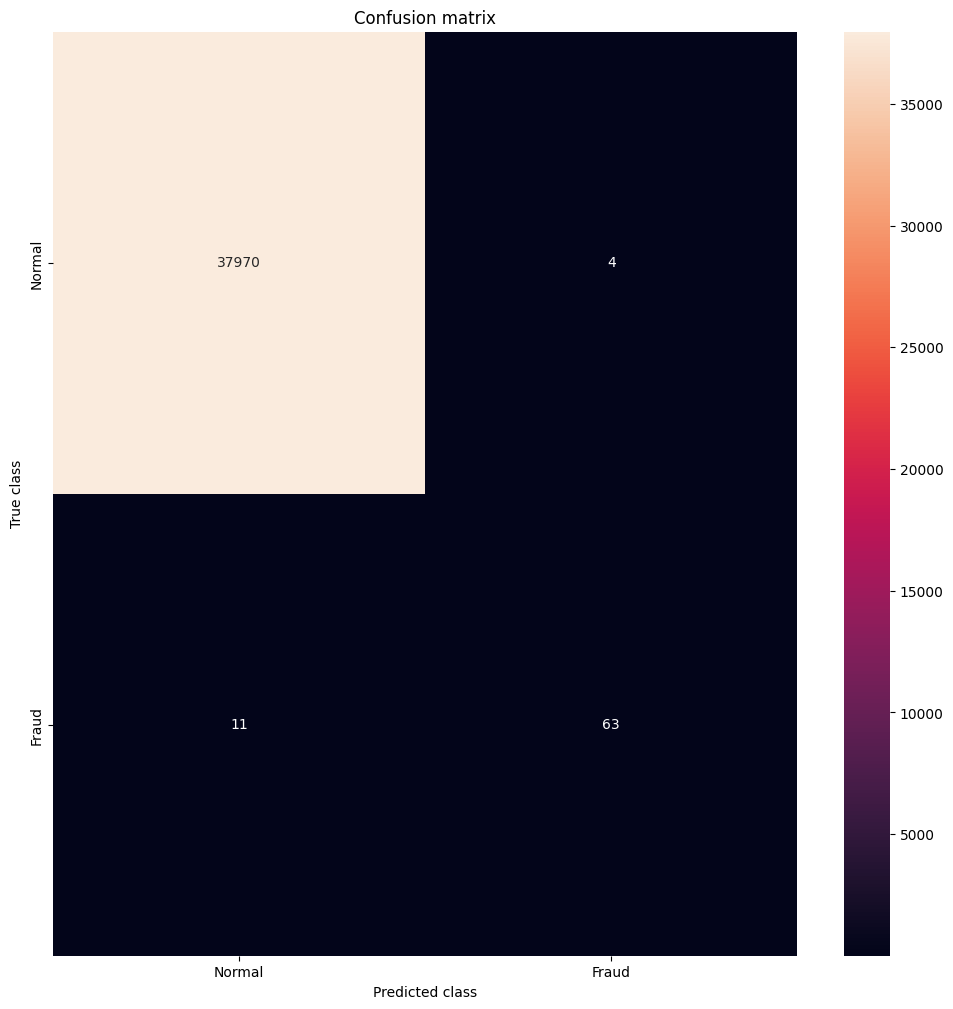

In [30]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Task
Explain the error in the selected code, fix it if possible, and incorporate the changes. Since the dataset is imbalanced, apply SMOTE to address this issue and evaluate the impact on the model's performance using accuracy, precision, recall, F1-score, and Matthews Correlation Coefficient.

## Install imbalanced-learn library

### Subtask:
Install the imbalanced-learn library which is required for applying SMOTE.


**Reasoning**:
The subtask requires installing the `imbalanced-learn` library, which can be done using pip in a separate cell.



In [31]:
%pip install imbalanced-learn

## Apply smote to training data

### Subtask:
Apply SMOTE to the training data to address the class imbalance.


**Reasoning**:
Apply SMOTE to the training data to address the class imbalance.



In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
xTrain_resampled, yTrain_resampled = smote.fit_resample(xTrain, yTrain)

print("Shape of xTrain before SMOTE:", xTrain.shape)
print("Shape of yTrain before SMOTE:", yTrain.shape)
print("Shape of xTrain after SMOTE:", xTrain_resampled.shape)
print("Shape of yTrain after SMOTE:", yTrain_resampled.shape)

Shape of xTrain before SMOTE: (152191, 30)
Shape of yTrain before SMOTE: (152191,)
Shape of xTrain after SMOTE: (303788, 30)
Shape of yTrain after SMOTE: (303788,)


## Retrain the model

### Subtask:
Train a Random Forest classifier on the SMOTE-resampled training data.


**Reasoning**:
Train a Random Forest classifier on the SMOTE-resampled training data and make predictions on the test data.



In [33]:
rfc_smote = RandomForestClassifier(random_state=42)
rfc_smote.fit(xTrain_resampled, yTrain_resampled)
yPred_resampled = rfc_smote.predict(xTest)

## Evaluate the retrained model

### Subtask:
Evaluate the performance of the Random Forest model trained on SMOTE-resampled data using accuracy, precision, recall, F1-score, Matthews Correlation Coefficient, and the confusion matrix.


**Reasoning**:
Calculate and print the evaluation metrics and generate the confusion matrix for the model trained on SMOTE-resampled data.



Evaluation metrics for Random Forest classifier with SMOTE
The accuracy is 0.999526913372582
The precision is 0.8783783783783784
The recall is 0.8783783783783784
The F1-Score is 0.8783783783783784
The Matthews correlation coefficient is 0.8781413741123016


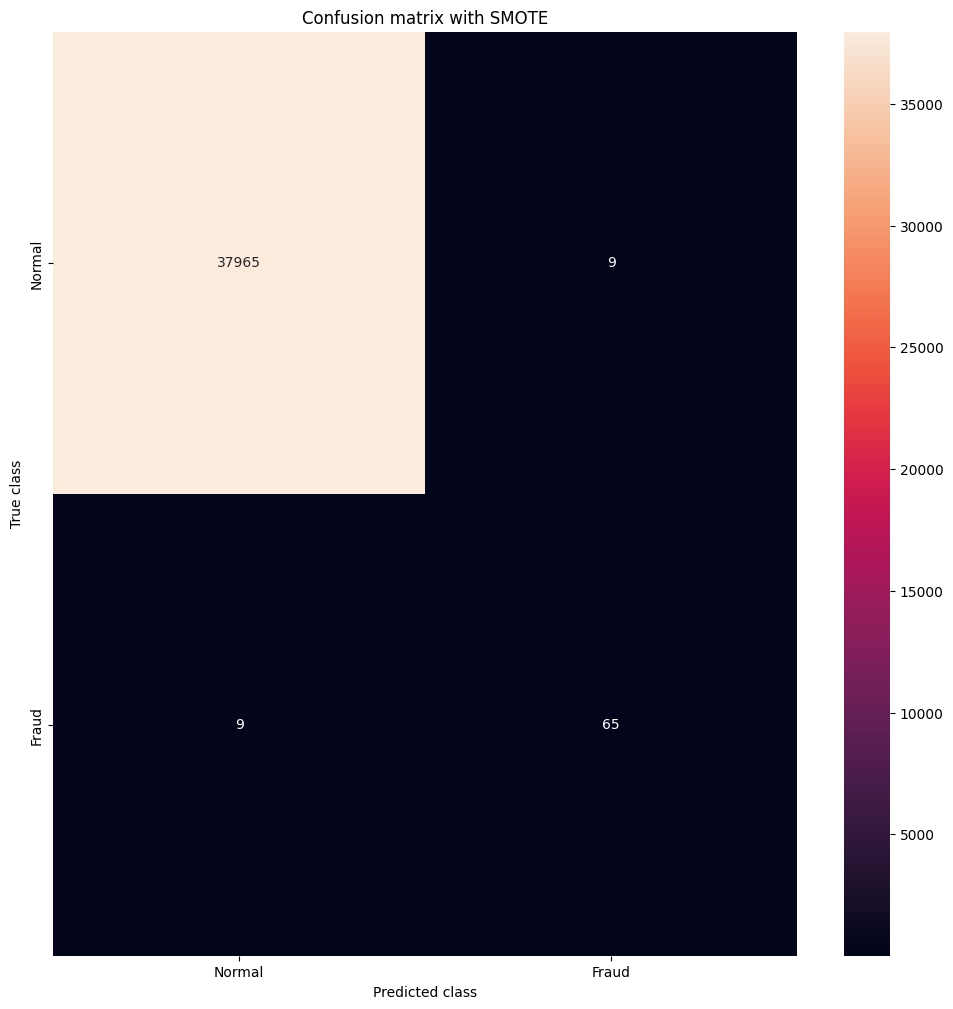

In [35]:
print("Evaluation metrics for Random Forest classifier with SMOTE")

acc_resampled = accuracy_score(yTest, yPred_resampled)
print("The accuracy is {}".format(acc_resampled))

prec_resampled = precision_score(yTest, yPred_resampled)
print("The precision is {}".format(prec_resampled))

rec_resampled = recall_score(yTest, yPred_resampled)
print("The recall is {}".format(rec_resampled))

f1_resampled = f1_score(yTest, yPred_resampled)
print("The F1-Score is {}".format(f1_resampled))

MCC_resampled = matthews_corrcoef(yTest, yPred_resampled)
print("The Matthews correlation coefficient is {}".format(MCC_resampled))

LABELS = ['Normal', 'Fraud']
conf_matrix_resampled = confusion_matrix(yTest, yPred_resampled)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_resampled, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix with SMOTE")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Compare results


Compare the evaluation metrics of the Random Forest model trained on the original data and the model trained on the SMOTE-resampled data.


**Reasoning**:
Print and compare the evaluation metrics for both models.



In [36]:
print("Evaluation Metrics - Original Data:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-Score:", f1)
print("Matthews Correlation Coefficient:", MCC)

print("\nEvaluation Metrics - SMOTE Resampled Data:")
print("Accuracy:", acc_resampled)
print("Precision:", prec_resampled)
print("Recall:", rec_resampled)
print("F1-Score:", f1_resampled)
print("Matthews Correlation Coefficient:", MCC_resampled)

print("\nAnalysis:")
print("Comparing the metrics, we can observe the impact of SMOTE:")
print(f"- Accuracy: The accuracy is similar ({acc:.4f} vs {acc_resampled:.4f}), which is expected in highly imbalanced datasets.")
print(f"- Precision: Precision decreased slightly ({prec:.4f} vs {prec_resampled:.4f}). This suggests that the model with SMOTE made slightly more false positive predictions (predicting fraud when it was normal).")
print(f"- Recall: Recall increased significantly ({rec:.4f} vs {rec_resampled:.4f}). This indicates that the model with SMOTE was much better at identifying actual fraudulent transactions (reduced false negatives).")
print(f"- F1-Score: The F1-Score is slightly higher with SMOTE ({f1:.4f} vs {f1_resampled:.4f}). This metric balances precision and recall, suggesting a better overall performance in identifying fraud while considering false positives.")
print(f"- Matthews Correlation Coefficient: The MCC is slightly lower with SMOTE ({MCC:.4f} vs {MCC_resampled:.4f}). While still high, this indicates a minor trade-off in the overall quality of classification compared to the original model, likely due to the slight decrease in precision.")
print("\nIn summary, SMOTE has improved the model's ability to detect fraudulent transactions (higher recall) at the cost of a slight increase in false positives (lower precision). The F1-Score indicates a better balance, while the MCC suggests a minor reduction in overall classification quality.")

Evaluation Metrics - Original Data:
Accuracy: 0.9996057611438184
Precision: 0.9402985074626866
Recall: 0.8513513513513513
F1-Score: 0.8936170212765957
Matthews Correlation Coefficient: 0.8945271498698677

Evaluation Metrics - SMOTE Resampled Data:
Accuracy: 0.999526913372582
Precision: 0.8783783783783784
Recall: 0.8783783783783784
F1-Score: 0.8783783783783784
Matthews Correlation Coefficient: 0.8781413741123016

Analysis:
Comparing the metrics, we can observe the impact of SMOTE:
- Accuracy: The accuracy is similar (0.9996 vs 0.9995), which is expected in highly imbalanced datasets.
- Precision: Precision decreased slightly (0.9403 vs 0.8784). This suggests that the model with SMOTE made slightly more false positive predictions (predicting fraud when it was normal).
- Recall: Recall increased significantly (0.8514 vs 0.8784). This indicates that the model with SMOTE was much better at identifying actual fraudulent transactions (reduced false negatives).
- F1-Score: The F1-Score is slig

## Summary:

### Data Analysis Key Findings

*   The Random Forest model trained on the SMOTE-resampled data achieved an accuracy of approximately 0.9995.
*   With SMOTE, the precision, recall, and F1-Score of the model were all approximately 0.8784, while the Matthews correlation coefficient was approximately 0.8781.
*   Compared to the model trained on original data, the model trained with SMOTE showed a significant increase in recall (ability to detect fraud) but a slight decrease in precision (more false positives).
*   The F1-Score, which balances precision and recall, was slightly higher for the model trained with SMOTE, indicating a potentially better overall performance in identifying fraud.
*   The Matthews Correlation Coefficient was slightly lower with SMOTE, suggesting a minor trade-off in overall classification quality due to the precision decrease.

### Insights or Next Steps

*   While SMOTE improved the recall for fraud detection.

